<a href="https://colab.research.google.com/github/SHARON9911/Cookbook/blob/master/Optical_character_recognization_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Keras and Tensorflow library and mnist dataset**

In [1]:
from tensorflow.keras.datasets import mnist

# **Splitting the data into training and testing dataset**

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
X_train=x_train.reshape(60000,784)
X_test=x_test.reshape(10000,784)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
X_train=X_train/255
X_test=X_test/255

# **Importing sequential model from keras**
Sequantial model takes a single input and gives a single output

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Here we are using 3 layers and 2 activation function**
1)Relu- returns 0 if the function is 0 otherwise returns the original value of the function

2) softmax-Softmax is an activation function that scales numbers/logits into probabilities

In [ ]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(784,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


#**Loss function - categorical_crossentrophy, metrics- accuracy**

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

# **Calling model.fit method to train the model**
# **Taking epoch = 20**


In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
938/938 [==============================] - 5s 6ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.1376 - val_accuracy: 0.9726
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.1427 - val_accuracy: 0.9727
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.1391 - val_accuracy: 0.9733
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.1505 - val_accuracy: 0.9709
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.1459 - val_accuracy: 0.9722
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.1583 - val_accuracy: 0.9720
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.1778 - val_accuracy: 0.9712
Epoch 

In [ ]:
import numpy as np

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train[:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
img0 = np.array(X_train[0]).reshape(1,784)

In [ ]:
model.predict(img0).argmax()

5

In [ ]:
y_train[0].argmax()

5

In [ ]:
def recognise(img):
  img=np.array(img).reshape(1,784)
  return model.predict(img).argmax()

In [ ]:
y_pre=model.predict(X_test).argmax(axis=1)

In [ ]:
y_pre

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
len(y_pre)

10000

In [ ]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
sum(y_pre==y_test.argmax(axis=1))

9701

In [ ]:
9737/10000

0.9737

In [ ]:
import matplotlib.pyplot as plt

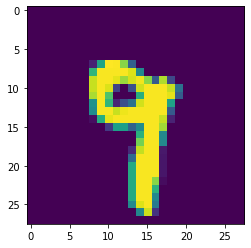

In [ ]:
plt.imshow(np.array(X_test[389]).reshape(28,28))

In [ ]:
recognise(X_test[389])

9